# Testing StyleGAN2

In [1]:
import sys
import os
from pathlib import Path

# We change the working directory to the root of the project
if not 'in_good_directory' in globals():
    sys.path.append(os.path.abspath("../src"))
    sys.path.append(os.path.abspath("../src/stylegan2"))
    root_path = Path.cwd().parent
    os.chdir(root_path)
    sys.path.append(root_path / "src")

    in_good_directory = True

In [2]:
Path.cwd()

WindowsPath('c:/Users/Mathis/Desktop/Github Projects/MVA/StyleGANInpainting')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


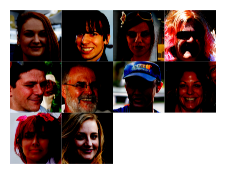

In [3]:
import stylegan2
from inpainting.utils import get_stylegan_generator, plot_images
from inpainting.sampling import sample, sample_silent

G = get_stylegan_generator()
samples = sample_silent(G, 10, device='cuda', seed=42)
plot_images(samples.clamp(-1, 1), nrow=4)